![netflix beautiful](netflix%20beautiful.png)


## 📖 Background

The Netflix Top 10 charts represent the most popular movies and TV series, with millions of viewers around the globe. Understanding what makes the biggest hits is crucial to making more hits.

## 💪 Challenge

Explore the dataset to understand the most common attributes of popular Netflix content. Your published notebook should contain a short report on the popular content, including summary statistics, visualizations, statistical models, and text describing any insights you found.

## 💾 The data

There are three datasets taken from [Netflix Top 10](https://top10.netflix.com). 

Each dataset is stored as a table in a PostgreSQL database.

- `all_weeks_global`: This contains the weekly top 10 list for movies (films) and TV series at a global level.
- `all_weeks_countries`: This contains the weekly top 10 list for movies (films) and TV series by country.
- `most_popular`: All-time most popular content by number of hours viewed in the first 28 days from launch.

The data source page describes the methodology for data collection in detail. In particular:

- Content is categorized as Film (English), TV (English), Film (Non-English), and TV (Non-English).
- Each season of a TV series is considered separately.
- - Popularity is measured as the total number of hours that Netflix members around the world watched each title from Monday to Sunday of the previous week.
- Weekly reporting is rounded to the nearest 10 000 viewers.

## Database integration

To access the data, use the sample integration named "Competition Netflix Top 10".

# Top Weekly Global Movies on Netflix 

In [1]:
SELECT *
	FROM all_weeks_global
   
    

week  ... cumulative_weeks_in_top_10
0    2022-12-04  ...                          2
1    2022-12-04  ...                          2
2    2022-12-04  ...                          1
3    2022-12-04  ...                          3
4    2022-12-04  ...                          1
...         ...  ...                        ...
2995 2021-07-04  ...                          1
2996 2021-07-04  ...                          1
2997 2021-07-04  ...                          1
2998 2021-07-04  ...                          1
2999 2021-07-04  ...                          1

[3000 rows x 7 columns]

In [2]:
# create a dataframe named named world from all_weeks_global postgresql table
import pandas as pd
world  = df

In [3]:
# find the total number of rows and columns

world.shape

(3000, 7)

In [4]:
# any missing values?

world.isna().sum()

# there are no missing values

week                          0
category                      0
weekly_rank                   0
show_title                    0
season_title                  0
weekly_hours_viewed           0
cumulative_weeks_in_top_10    0
dtype: int64

In [5]:

# display max number of rows
pd.set_option('display.max_rows', None)

world.dtypes

week                          datetime64[ns]
category                              object
weekly_rank                            int64
show_title                            object
season_title                          object
weekly_hours_viewed                    int64
cumulative_weeks_in_top_10             int64
dtype: object

In [6]:
min_week = min (world['week'])
max_week = max(world['week'])

min_week, max_week, max_week-min_week



(Timestamp('2021-07-04 00:00:00'),
 Timestamp('2022-12-04 00:00:00'),
 Timedelta('518 days 00:00:00'))

In [7]:
len(world.week.value_counts())

75

## This data was derived for over a period of 75 weeks (518 days) from 2021-07-04 to 2022-12-04

## Most watched category  worldwide in descending order

In [9]:
world.groupby(['category'])['weekly_hours_viewed'].mean().round().sort_values(ascending = False).reset_index()

category  weekly_hours_viewed
0         TV (English)           35186373.0
1     TV (Non-English)           21729653.0
2      Films (English)           16676747.0
3  Films (Non-English)            6321187.0

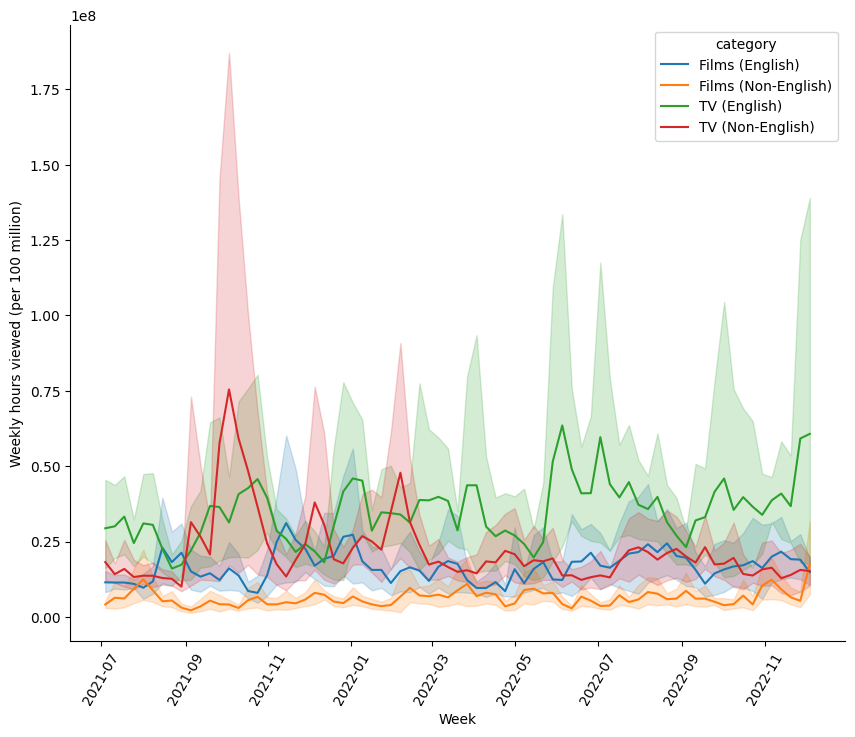

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure (figsize = (10,8))
sns.lineplot(x='week', y = 'weekly_hours_viewed', hue = 'category',  data = world)
plt.ylabel('Weekly hours viewed (per 100 million)')
plt.xlabel ('Week')
plt.xticks (rotation = 60)
sns.despine()


## From the table and graph depicted above, the top most viewed categories in descending order are 
1. TV (English) 
2. TV (Non-English)
3. Films (English) 
3. Films (Non-English) 


## Top 10 TV shows with the most weekly hours viewed worldwide

In [11]:
top_TV_shows = world.groupby(['season_title', 'category'])['weekly_hours_viewed'].mean().round().sort_values(ascending = False)[:10]
top_TV_shows = top_TV_shows.reset_index()
top_TV_shows

season_title  ... weekly_hours_viewed
0                        Wednesday: Season 1  ...         376260000.0
1  DAHMER: Monster: The Jeffrey Dahmer Story  ...         137495714.0
2                       Squid Game: Season 1  ...         114475000.0
3                          Stranger Things 4  ...          99332105.0
4                      The Witcher: Season 2  ...          86581667.0
5                      The Watcher: Season 1  ...          79006000.0
6                    Sex Education: Season 3  ...          74625000.0
7                        Cobra Kai: Season 4  ...          73237500.0
8                             1899: Season 1  ...          70593333.0
9                       Bridgerton: Season 2  ...          70476364.0

[10 rows x 3 columns]

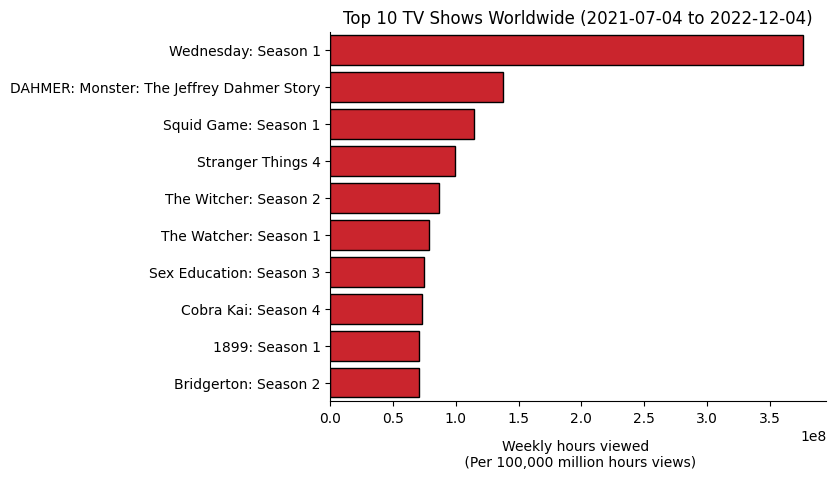

In [13]:
# I have decided to have fun and go with netflix primary colors
sns.barplot(y = 'season_title', x = 'weekly_hours_viewed', color = '#E50914',edgecolor = 'black', data = top_TV_shows)
plt.title('Top 10 TV Shows Worldwide (2021-07-04 to 2022-12-04)')
plt.xlabel('Weekly hours viewed \n (Per 100,000 million hours views)', labelpad = 10)
plt.ylabel('')
sns.despine()

### The above findings so far are quite interesting: Nine out of the top 10 shows were English TV shows while only one (Squid Game) was a non-English TV show.

### It appears that globally, mankind prefers watching English TV shows.

### Another remarkable discovery is that these findings appear to be at variance with the spike noted in the lineplot from 2021-09-26 to 2021-10-17 made by a non-English TV show - Squid Game: Season 1. The spike on face value portends that Squid Game should be the most watched but that was not the case. Quite puzzling





# Top 10 Film shows watched globally

In [14]:
films = world[world.category.str.startswith('Film')]


top_film_shows = films.groupby(['show_title', 'category'])['weekly_hours_viewed'].mean().round().sort_values(ascending = False)[:10]
top_film_shows = top_film_shows.reset_index()

top_film_shows

show_title             category  weekly_hours_viewed
0                 Troll  Films (Non-English)           75860000.0
1         Don't Look Up      Films (English)           48697500.0
2          The Gray Man      Films (English)           44330000.0
3      The Unforgivable      Films (English)           43910000.0
4   The Kissing Booth 3      Films (English)           42196667.0
5         Purple Hearts      Films (English)           40080000.0
6        Enola Holmes 2      Films (English)           39507500.0
7       Army of Thieves      Films (English)           38517500.0
8             Day Shift      Films (English)           37452500.0
9  The Harder They Fall      Films (English)           37196667.0

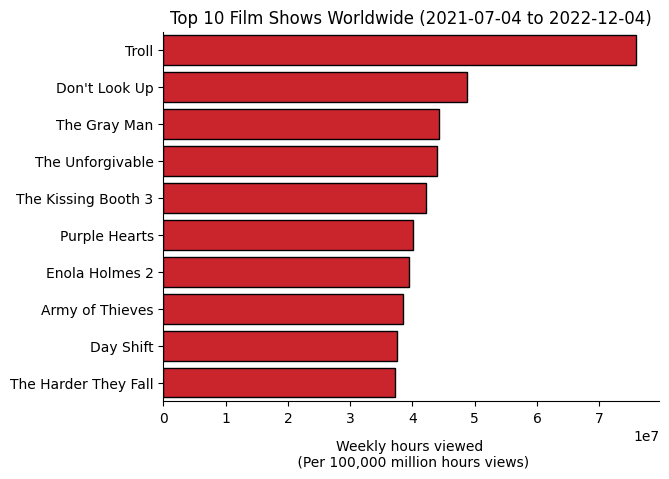

In [15]:
sns.barplot(y = 'show_title', x = 'weekly_hours_viewed', color = '#E50914',edgecolor = 'black', data = top_film_shows)
plt.title('Top 10 Film Shows Worldwide (2021-07-04 to 2022-12-04)')
plt.xlabel('Weekly hours viewed \n (Per 100,000 million hours views)', labelpad = 10)
plt.ylabel('')
sns.despine()

### For the top 10 Films show, 90% were English shows except for Troll, which leads the pack and is a non-English show. Having watched the film myself, I attest to its originality and refreshing take on a mythical creature

## Average cumulative weeks in top 10 for the most popular TV shows

To solve the puzzle on why Squid game is in third place, i decided to check the cumulative weeks of the top 10 watched shows to glean some insights. 

In [16]:
season = world[world.season_title.isin(top_TV_shows.season_title.values)]
cum = season.groupby('season_title')['cumulative_weeks_in_top_10'].mean().sort_values(ascending = False)
cum = cum.reset_index()
cum

season_title  cumulative_weeks_in_top_10
0                       Squid Game: Season 1                        10.5
1                          Stranger Things 4                        10.0
2                       Bridgerton: Season 2                         6.0
3  DAHMER: Monster: The Jeffrey Dahmer Story                         4.0
4                    Sex Education: Season 3                         3.5
5                      The Witcher: Season 2                         3.5
6                      The Watcher: Season 1                         3.0
7                        Cobra Kai: Season 4                         2.5
8                             1899: Season 1                         2.0
9                        Wednesday: Season 1                         1.5

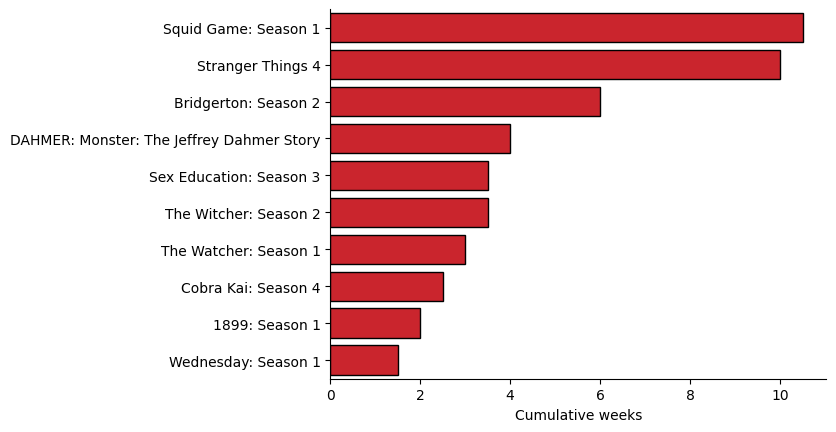

In [17]:
sns.barplot(y = 'season_title' , x = 'cumulative_weeks_in_top_10', color = '#E50914', 
            edgecolor = 'black', data = cum)
plt.ylabel('')
plt.xlabel('Cumulative weeks')
sns.despine()


### Out of the top 10 most watched shows worldwide, the show with the highest cumulative weeks as one of the top 10 watched show is Squid game: Season 1 with an average of 10.5 weeks which is fascinating particularly since Wednesday: Season 1 which is the most watched show had only 1.5 cumulative weeks and Dahmer: Monster only 4. Very puzzling indeed. 

## Average cumulative weeks in top 10 for the most popular TV shows

In [18]:
film_subdata = world[world.show_title.isin(top_film_shows.show_title.values)]
cum_film = film_subdata.groupby('show_title')['cumulative_weeks_in_top_10'].mean().sort_values(ascending = False)
cum_film = cum_film.reset_index()
cum_film

show_title  cumulative_weeks_in_top_10
0         Don't Look Up                         4.5
1         Purple Hearts                         3.5
2          The Gray Man                         3.5
3      The Unforgivable                         3.0
4       Army of Thieves                         2.5
5             Day Shift                         2.5
6        Enola Holmes 2                         2.5
7  The Harder They Fall                         2.0
8   The Kissing Booth 3                         2.0
9                 Troll                         1.0

## Interesting. Troll which is the most watched film show had only spent an average of 1 week in the top rank.

# Most Popular Shows in the First 28 Days

In [19]:
SELECT SETSEED(0.5);

SELECT *
	FROM most_popular
    ORDER BY RANDOM()
    LIMIT 10000

category  ...  hours_viewed_first_28_days
0      TV (Non-English)  ...                  1650450000
1       Films (English)  ...                   231340000
2   Films (Non-English)  ...                    78300000
3          TV (English)  ...                   582100000
4       Films (English)  ...                   228690000
5       Films (English)  ...                   214570000
6   Films (Non-English)  ...                   110520000
7   Films (Non-English)  ...                    75860000
8       Films (English)  ...                   233160000
9          TV (English)  ...                   625490000
10      Films (English)  ...                   253870000
11     TV (Non-English)  ...                   326910000
12     TV (Non-English)  ...                   316830000
13         TV (English)  ...                  1352090000
14      Films (English)  ...                   364020000
15      Films (English)  ...                   214700000
16     TV (Non-English)  ...                   275300000
17  Films (Non-English)  ...                    94130000
18         TV (English)  ...                   856220000
19     TV (Non-English)  ...                   792230000
20         TV (English)  ...                   752520000
21      Films (English)  ...                   282020000
22  Films (Non-English)  ...                    67340000
23      Films (English)  ...                   359790000
24         TV (English)  ...                   656260000
25         TV (English)  ...                   496120000
26         TV (English)  ...                   569480000
27      Films (English)  ...                   209250000
28         TV (English)  ...                   541010000
29     TV (Non-English)  ...                   619010000
30  Films (Non-English)  ...                   101360000
31  Films (Non-English)  ...                    92440000
32     TV (Non-English)  ...                   560780000
33     TV (Non-English)  ...                   266430000
34  Films (Non-English)  ...                    66600000
35  Films (Non-English)  ...                    78630000
36     TV (Non-English)  ...                   426400000
37         TV (English)  ...                   511920000
38     TV (Non-English)  ...                   402470000
39  Films (Non-English)  ...                   108090000

[40 rows x 5 columns]

In [20]:
popular = df

## Most Popular TV Shows

In [21]:
most_popular = popular.groupby(['show_title', 'season_title', 'category', 'rank'])['hours_viewed_first_28_days'].mean().round().sort_values(ascending = False)[:10]
most_popular = most_popular.reset_index()
most_popular 

show_title  ... hours_viewed_first_28_days
0       Squid Game  ...               1.650450e+09
1  Stranger Things  ...               1.352090e+09
2           DAHMER  ...               8.562200e+08
3      Money Heist  ...               7.922300e+08
4        Wednesday  ...               7.525200e+08
5       Bridgerton  ...               6.562600e+08
6       Bridgerton  ...               6.254900e+08
7      Money Heist  ...               6.190100e+08
8  Stranger Things  ...               5.821000e+08
9          Lucifer  ...               5.694800e+08

[10 rows x 5 columns]

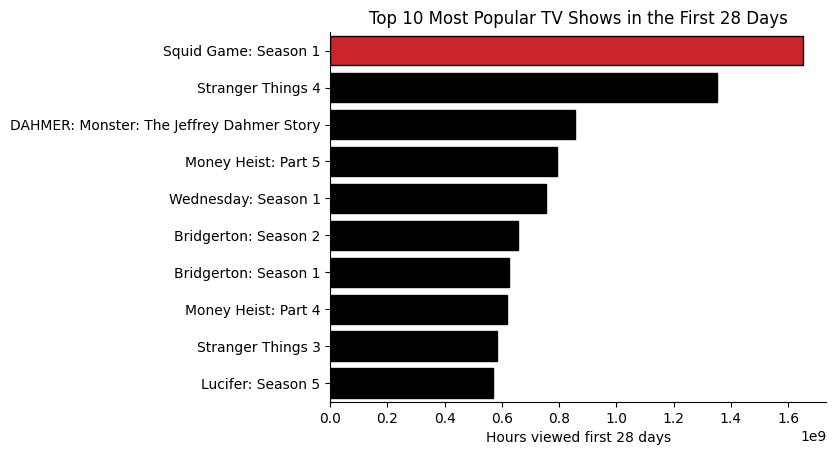

In [22]:
colors = ['#E50914' if i ==0 else 'black' for i in range(10)]

sns.barplot(y = most_popular['season_title'],x = most_popular['hours_viewed_first_28_days'],  palette = colors, edgecolor = 'black')
plt.title('Top 10 Most Popular TV Shows in the First 28 Days')
plt.ylabel('')
plt.xlabel('Hours viewed first 28 days')
sns.despine()


In [23]:
colors

['#E50914',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black']

## How many times did Squid Game and Wednesday appear in the world dataset

In [24]:
entries = world.groupby('show_title').size().sort_values(ascending = False).reset_index()
entries [ (entries['show_title'] == 'Squid Game') | (entries['show_title'].str.startswith('Wednesday'))]

show_title   0
8    Squid Game  20
428   Wednesday   2

## Voila, The puzzle is solved!!!

Squid Game: Season 1, a non-English TV show is unequivocally the GOTT! Greatest of this time. 
- The first table showed the weekly stats which is dependent on the denominator-Time!.The first table whose time range was 75 weeks showed the entire timeline of Squid game but just the early stages of Wednesday: Season 1 - a show that was just recently released!!!

Squid game's average weekly hours view stats was assessed based on the total number of entries (20 entries) which is in sharp contrast to that of Wednesday which appeared just twice. Similarly, Squid game had a cumulative weeks on top for 10.5 weeks compared to Wednesday: Season 1 of just 1.5 weeks. This clearly shows why the average stats for Squid game was comparably lower than that of Wednesday 

This last table on popularity within the first 28 days provided some form of scaling, pitting both movies on the same scale. It also clearly explains the spike seen in the lineplot graph of the non-English TV show which is squid game. Wednesday: Season 1 is now in its rightful spot in the 5th position. 

In this table, the top 10 popular shows in the first 28 days were all TV shows with 30% of them been non-English TV shows. This makes a lot of sense, because I prefer TV shows  to Films as well because the characters are better developed which makes for a more enjoyable viewing. 

Fun fact, out of these ten shows, I have watched the following
1. Squid game (Definitely!!!)
2. Wednesday (Refreshingly different)
3. Bridgerton (Seasons 1 and 2) (I really miss Rege-Jean Page, the Duke of Hastings). I must say that i am quite surprised that season 2 fared better in terms of global views. I personally thought it missed the mark completely. 
4. Lucifer but just Seasons 1 and 2. (Seeing now that season 5 is one of the top popular shows, albeit ranked 7, I may just have to continue the series)




## Most popular Film show in the first 28 days

In [25]:
films_popular = popular[popular.category.str.startswith('Film')]

films_most_popular = films_popular.groupby(['show_title','category', 'rank'])['hours_viewed_first_28_days'].mean().round().sort_values(ascending = False)[:10]
films_most_popular = films_most_popular.reset_index()

films_most_popular 

show_title         category  rank  hours_viewed_first_28_days
0           Red Notice  Films (English)     1                 364020000.0
1        Don't Look Up  Films (English)     2                 359790000.0
2             Bird Box  Films (English)     3                 282020000.0
3         The Gray Man  Films (English)     4                 253870000.0
4     The Adam Project  Films (English)     5                 233160000.0
5           Extraction  Films (English)     6                 231340000.0
6        Purple Hearts  Films (English)     7                 228690000.0
7     The Unforgivable  Films (English)     8                 214700000.0
8         The Irishman  Films (English)     9                 214570000.0
9  The Kissing Booth 2  Films (English)    10                 209250000.0

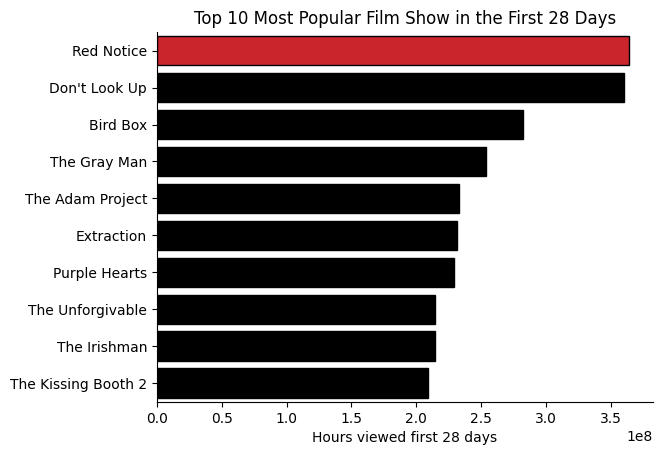

In [26]:
colors = ['#E50914' if i ==0 else 'black' for i in range(10)]

sns.barplot(y = films_most_popular['show_title'],x = films_most_popular['hours_viewed_first_28_days'],  palette = colors, edgecolor = 'black')
plt.title('Top 10 Most Popular Film Show in the First 28 Days')
plt.ylabel('')
plt.xlabel('Hours viewed first 28 days')
sns.despine()

### The incongruence between the top 10 Film shows in the first 28 days vs Top 10 Film shows per average weekly hour ratings was even more pronounced here. 

## Compare the 10 most popular film in 28 days with that of the top 10 films  with highest weekly hours view 

In [27]:
compare = pd.DataFrame({'Top 10 films with highest average weekly hours view':top_film_shows['show_title'],'Top 10 Most Popular Films in the first 28 days': films_most_popular['show_title']})
compare

Top 10 films with highest average weekly hours view Top 10 Most Popular Films in the first 28 days
0                                              Troll                                      Red Notice
1                                      Don't Look Up                                   Don't Look Up
2                                       The Gray Man                                        Bird Box
3                                   The Unforgivable                                    The Gray Man
4                                The Kissing Booth 3                                The Adam Project
5                                      Purple Hearts                                      Extraction
6                                     Enola Holmes 2                                   Purple Hearts
7                                    Army of Thieves                                The Unforgivable
8                                          Day Shift                                    The Irishman
9                               The Harder They Fall                             The Kissing Booth 2

### The top movies watched in the first 28 days were all English Films! 

### When placed on the same scale, the film - Don't Look Up - appears to be best movie due to its consistency in been among the best three movies per average weekly hours rating and in the first 28 days,  unlike its counterparts that trailed quite behind. Notice that Troll, despite been the film with the highest average weekly hour ratings was not even among the top 10 most popular film in the first 28 days.  

# Determine how the top 10 most popular TV and Film shows ranked in each country

In [28]:
SELECT SETSEED(0.5);
SELECT *
	FROM all_weeks_countries
    ORDER BY RANDOM()
    LIMIT 10000
    

country_name  ... cumulative_weeks_in_top_10
0                   Brazil  ...                          3
1                   Canada  ...                          2
2                    Egypt  ...                          2
3                  Austria  ...                          3
4                   Serbia  ...                          1
5                   Panama  ...                          2
6                 Bulgaria  ...                          1
7                   Poland  ...                          2
8                    Qatar  ...                          2
9                   Norway  ...                          2
10                Pakistan  ...                          2
11                 Morocco  ...                          4
12              Guadeloupe  ...                          5
13             Switzerland  ...                          1
14               Australia  ...                          1
15                   Kenya  ...                          1
16             Switzerland  ...                          2
17                  Brazil  ...                          1
18                 Uruguay  ...                          1
19                  Greece  ...                          2
20                 Ireland  ...                          1
21                 Germany  ...                          6
22                  Latvia  ...                          2
23             South Korea  ...                          2
24                  Norway  ...                          2
25           New Caledonia  ...                          2
26                   India  ...                          2
27                   Italy  ...                          1
28                Maldives  ...                          2
29                   Qatar  ...                          1
30               Australia  ...                         12
31                 Romania  ...                          6
32                  Sweden  ...                          1
33                  Canada  ...                          1
34                  Russia  ...                          2
35             El Salvador  ...                          1
36                 Ecuador  ...                          2
37                 Lebanon  ...                          2
38             Switzerland  ...                          8
39                 Iceland  ...                          1
40               Guatemala  ...                          3
41                    Oman  ...                          1
42                  Cyprus  ...                          6
43                Colombia  ...                          1
44          Czech Republic  ...                          2
45                  Israel  ...                          2
46                Slovakia  ...                          4
47    United Arab Emirates  ...                          2
48                Paraguay  ...                          2
49                 Réunion  ...                          1
50               Nicaragua  ...                          1
51              Martinique  ...                          3
52                 Ecuador  ...                          2
53                 Iceland  ...                          1
54          United Kingdom  ...                          2
55                    Peru  ...                          5
56                  Taiwan  ...                          1
57                   Chile  ...                          1
58                 Ukraine  ...                          4
59                  Poland  ...                          1
60                  Poland  ...                          2
61               Argentina  ...                          1
62                   Spain  ...                          4
63                 Vietnam  ...                          6
64                 Belgium  ...                          2
65            Saudi Arabia  ...                          3
66                 Estonia  ...                          7
67

For this dataset, I had to limit the random values generated to 10000 which was the maximum my workspace can allow. The random function was called upon to imperfectly mimic the complete dataset which unfortunately could not be loaded due to lack of computing power and the SETSEED included so that my outputs will remain the same.


In [29]:
country = df

## Data Exploration

In [30]:
# determine the number of countries in this dataset
country['country_name'].nunique()

94

94

In [31]:
# The unique countries are listed below and the distribution of rows in each countries appears to be largely the same. 
# The dataset is therefore not imbalanced country wise

country.groupby('country_name').size().reset_index()

country_name    0
0              Argentina  124
1              Australia  110
2                Austria  130
3                Bahamas  106
4                Bahrain   99
5             Bangladesh  100
6                Belgium   90
7                Bolivia  101
8                 Brazil  109
9               Bulgaria  113
10                Canada  126
11                 Chile  118
12              Colombia  102
13            Costa Rica  110
14               Croatia  109
15                Cyprus   85
16        Czech Republic   98
17               Denmark  120
18    Dominican Republic  106
19               Ecuador  129
20                 Egypt  108
21           El Salvador  104
22               Estonia  112
23               Finland  101
24                France  103
25               Germany  117
26                Greece  119
27            Guadeloupe  105
28             Guatemala   95
29              Honduras   98
30             Hong Kong   84
31               Hungary  107
32               Iceland  114
33                 India   91
34             Indonesia  121
35               Ireland  112
36                Israel  117
37                 Italy  105
38               Jamaica  106
39                 Japan  103
40                Jordan  105
41                 Kenya  107
42                Kuwait   94
43                Latvia  127
44               Lebanon  112
45             Lithuania  110
46            Luxembourg   92
47              Malaysia  122
48              Maldives  120
49                 Malta  105
50            Martinique  107
51             Mauritius   89
52                Mexico  109
53               Morocco  100
54           Netherlands  106
55         New Caledonia  106
56           New Zealand  117
57             Nicaragua  103
58               Nigeria  107
59                Norway   90
60                  Oman  107
61              Pakistan  100
62                Panama   89
63              Paraguay  100
64                  Peru  111
65           Philippines   98
66                Poland  116
67              Portugal  109
68                 Qatar  112
69               Romania  118
70                Russia   50
71               Réunion  112
72          Saudi Arabia  106
73                Serbia  102
74             Singapore  102
75              Slovakia  121
76              Slovenia   86
77          South Africa  120
78           South Korea  107
79                 Spain  107
80             Sri Lanka   93
81                Sweden  121
82           Switzerland  110
83                Taiwan  100
84              Thailand  102
85   Trinidad and Tobago  105
86                Turkey   99
87               Ukraine  100
88  United Arab Emirates  126
89        United Kingdom  103
90         United States  100
91               Uruguay  115
92             Venezuela  109
93               Vietnam  109

country_name    0
0              Argentina  124
1              Australia  110
2                Austria  130
3                Bahamas  106
4                Bahrain   99
5             Bangladesh  100
6                Belgium   90
7                Bolivia  101
8                 Brazil  109
9               Bulgaria  113
10                Canada  126
11                 Chile  118
12              Colombia  102
13            Costa Rica  110
14               Croatia  109
15                Cyprus   85
16        Czech Republic   98
17               Denmark  120
18    Dominican Republic  106
19               Ecuador  129
20                 Egypt  108
21           El Salvador  104
22               Estonia  112
23               Finland  101
24                France  103
25               Germany  117
26                Greece  119
27            Guadeloupe  105
28             Guatemala   95
29              Honduras   98
30             Hong Kong   84
31               Hungary  107
32               Iceland  114
33                 India   91
34             Indonesia  121
35               Ireland  112
36                Israel  117
37                 Italy  105
38               Jamaica  106
39                 Japan  103
40                Jordan  105
41                 Kenya  107
42                Kuwait   94
43                Latvia  127
44               Lebanon  112
45             Lithuania  110
46            Luxembourg   92
47              Malaysia  122
48              Maldives  120
49                 Malta  105
50            Martinique  107
51             Mauritius   89
52                Mexico  109
53               Morocco  100
54           Netherlands  106
55         New Caledonia  106
56           New Zealand  117
57             Nicaragua  103
58               Nigeria  107
59                Norway   90
60                  Oman  107
61              Pakistan  100
62                Panama   89
63              Paraguay  100
64                  Peru  111
65           Philippines   98
66                Poland  116
67              Portugal  109
68                 Qatar  112
69               Romania  118
70                Russia   50
71               Réunion  112
72          Saudi Arabia  106
73                Serbia  102
74             Singapore  102
75              Slovakia  121
76              Slovenia   86
77          South Africa  120
78           South Korea  107
79                 Spain  107
80             Sri Lanka   93
81                Sweden  121
82           Switzerland  110
83                Taiwan  100
84              Thailand  102
85   Trinidad and Tobago  105
86                Turkey   99
87               Ukraine  100
88  United Arab Emirates  126
89        United Kingdom  103
90         United States  100
91               Uruguay  115
92             Venezuela  109
93               Vietnam  109

In [32]:
# Determine the timeline and average number of weeks

minimum_week = min(country.week)
maximum_week = max(country.week)
duration = maximum_week - minimum_week

minimum_week, maximum_week, duration, country.week.nunique()

(Timestamp('2021-07-04 00:00:00+0000', tz='UTC'),
 Timestamp('2022-12-04 00:00:00+0000', tz='UTC'),
 Timedelta('518 days 00:00:00'),
 75)

(Timestamp('2021-07-04 00:00:00+0000', tz='UTC'),
 Timestamp('2022-12-04 00:00:00+0000', tz='UTC'),
 Timedelta('518 days 00:00:00'),
 75)

### In this dataset labelled world, there were 94 unique countries. The timeline was the same as the world dataset spanning from 2021-07-04 to 2022-12-04 with a combined total of 75 weeks (518 days)

## Top 10 most popular TV shows ranks by country

### General Overview

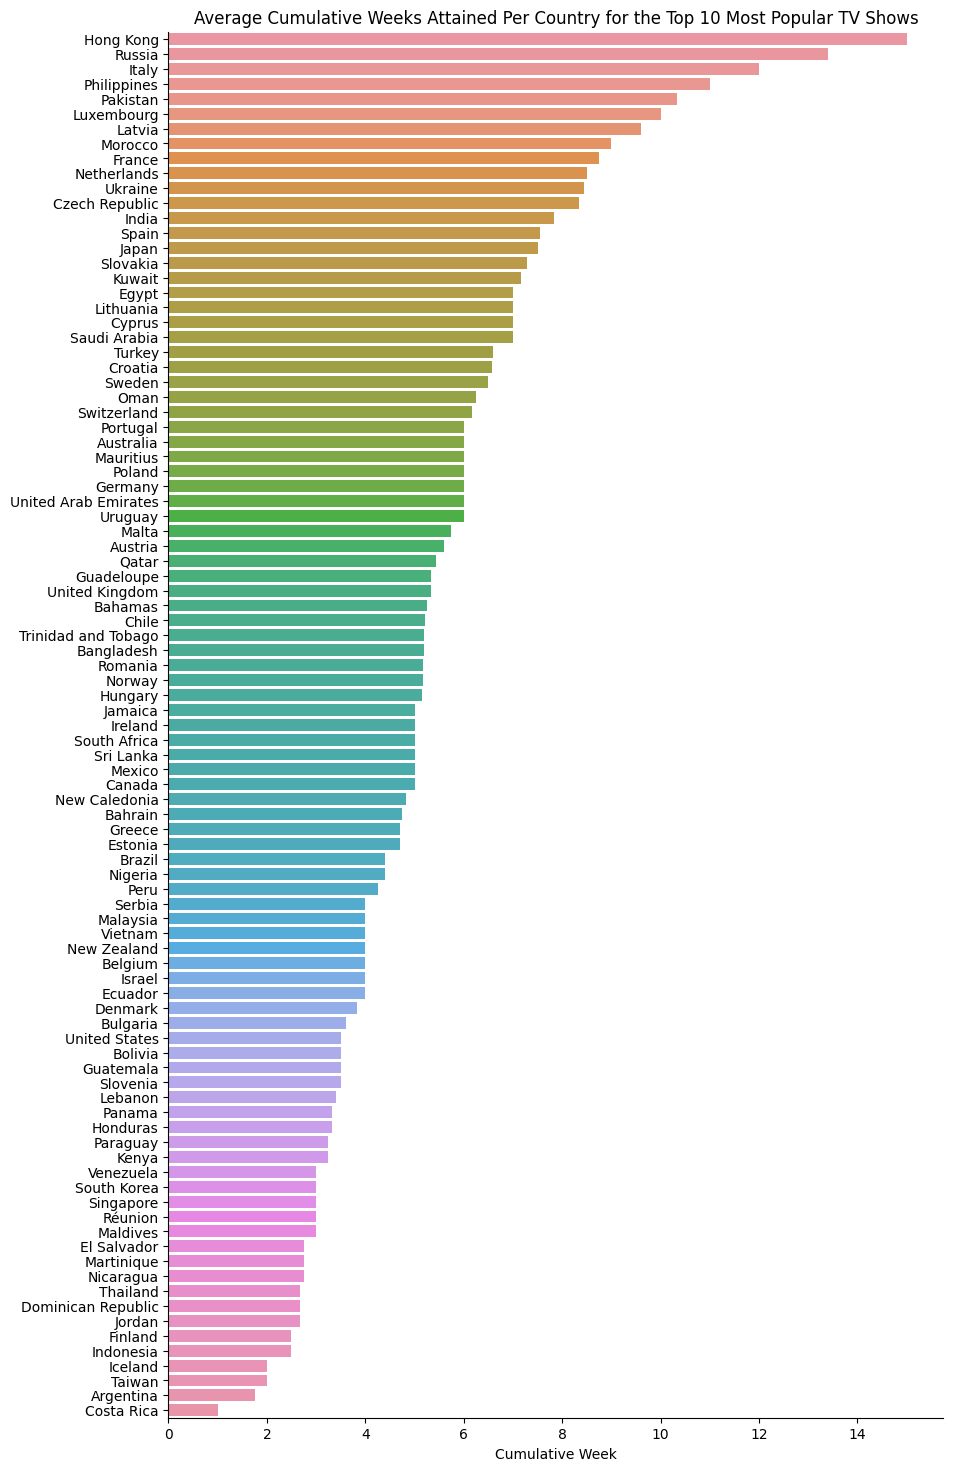

In [33]:
#select the rows with the top 10 most popular TV shows 

country_most_popular_TV = country[country.season_title.isin(most_popular.season_title.values)]

plt.figure (figsize = (10,18))
sns.barplot(x = 'cumulative_weeks_in_top_10', y = 'country_name', data = country_most_popular_TV.groupby('country_name')['cumulative_weeks_in_top_10'].mean().sort_values( ascending = False).reset_index(), errorbar = None)
plt.title('Average Cumulative Weeks Attained Per Country for the Top 10 Most Popular TV Shows')
plt.ylabel('')
plt.xlabel ('Cumulative Week')
sns.despine()


### It appears that the top 10 countries that enjoyed the top 10 most popular TV shows the most were 
1. Hong Kong
2. Russia
3. Italy
4. Philippines
5. Pakistan
6. Luxembourg
7. Latvia
8. Morocco
9. France
10. Netherlands

### While the countries that barely watched the top 10 most popular TV shows were 
1. Costa Rica
2. Argentina
3. Taiwan
4. Iceland
5. Indonesia
6. Finland
7. Jordan
8. Dominican Republic
9. Thailand
10. Nicaragua

### Which TV show performed best per country?

In [34]:
country_most_popular_TV = country[country.season_title.isin(most_popular.season_title.values)]
final_TV = country_most_popular_TV.groupby(['country_name','season_title'])[['weekly_rank','cumulative_weeks_in_top_10']].mean().round()
final_TV = final_TV.reset_index()
final_TV.sort_values(['cumulative_weeks_in_top_10'], ascending = [False]).reset_index(drop=True)

country_name  ... cumulative_weeks_in_top_10
0                Pakistan  ...                       18.0
1                Pakistan  ...                       16.0
2                   Italy  ...                       15.0
3                Pakistan  ...                       15.0
4                   Italy  ...                       15.0
5                 Ukraine  ...                       15.0
6               Hong Kong  ...                       15.0
7                 Nigeria  ...                       14.0
8                  Russia  ...                       14.0
9                 Croatia  ...                       14.0
10            Switzerland  ...                       14.0
11                 Russia  ...                       13.0
12                Romania  ...                       13.0
13                Morocco  ...                       13.0
14                Ukraine  ...                       13.0
15                  Qatar  ...                       12.0
16                 France  ...                       12.0
17                  Egypt  ...                       12.0
18                Morocco  ...                       12.0
19            Philippines  ...                       12.0
20                 Serbia  ...                       11.0
21         Czech Republic  ...                       11.0
22               Slovakia  ...                       11.0
23                Ukraine  ...                       11.0
24            Netherlands  ...                       11.0
25              Lithuania  ...                       11.0
26                Romania  ...                       10.0
27               Slovakia  ...                       10.0
28                  Spain  ...                       10.0
29                 Sweden  ...                       10.0
30                  Malta  ...                       10.0
31           Saudi Arabia  ...                       10.0
32                 Kuwait  ...                       10.0
33             Luxembourg  ...                       10.0
34                  India  ...                       10.0
35                  India  ...                       10.0
36                  Chile  ...                       10.0
37    Trinidad and Tobago  ...                       10.0
38                  Egypt  ...                       10.0
39              Australia  ...                       10.0
40                  Japan  ...                       10.0
41                 Latvia  ...                       10.0
42            Philippines  ...                       10.0
43                 Poland  ...                       10.0
44                Uruguay  ...                       10.0
45                 Turkey  ...                       10.0
46             Bangladesh  ...                        9.0
47               Malaysia  ...                        9.0
48              Sri Lanka  ...                        9.0
49                  Egypt  ...                        9.0
50                 Turkey  ...                        9.0
51                  Spain  ...                        9.0
52                  Malta  ...                        9.0
53   United Arab Emirates  ...                        9.0
54                 Canada  ...                        9.0
55                Denmark  ...                        9.0
56            Netherlands  ...                        9.0
57                 France  ...                        8.0
58                Estonia  ...                        8.0
59                  Spain  ...                        8.0
60                   Peru  ...                        8.0
61                 Greece  ...                        8.0
62              Mauritius  ...                        8.0
63                  Malta  ...                        8.0
64               Maldives  ...                        8.0
65                Hungary  ...                        8.0
66              Lithuania  ...                        8.0
67                Lebanon  ...                        8.0
68         

### The TV shows with the highest average cumulative weeks in top 10 in at least ten countries were
1. Money Heist: Part 5
2. Squid Game:Season 1
3. Stranger things 4


In Pakistan, Money Heist:Part 5 spent an average of 18 weeks in the top 10 spot followed by Squid Game: Season 1 in the same country! They really must love TV shows! 



### What about my home country, Nigeria? Which of the top 10 TV shows had the most screen time?

In [35]:
df = country_most_popular_TV[country_most_popular_TV.country_name.isin(['Nigeria'])]
shows = df.groupby(['country_name','season_title'])[['weekly_rank','cumulative_weeks_in_top_10']].mean().round()
shows = shows.reset_index()
shows.sort_values(['cumulative_weeks_in_top_10'], ascending = [False]).reset_index(drop=True)

country_name  ... cumulative_weeks_in_top_10
0      Nigeria  ...                       14.0
1      Nigeria  ...                        4.0
2      Nigeria  ...                        2.0
3      Nigeria  ...                        1.0
4      Nigeria  ...                        1.0

[5 rows x 4 columns]

### Ha!! Definitely not surprised..Squid Game: Season 1 remains undeniably popular worldwide. 

``

## Top 10 most popular films per country ranked by cumulative weeks and weekly rank

### General Overview

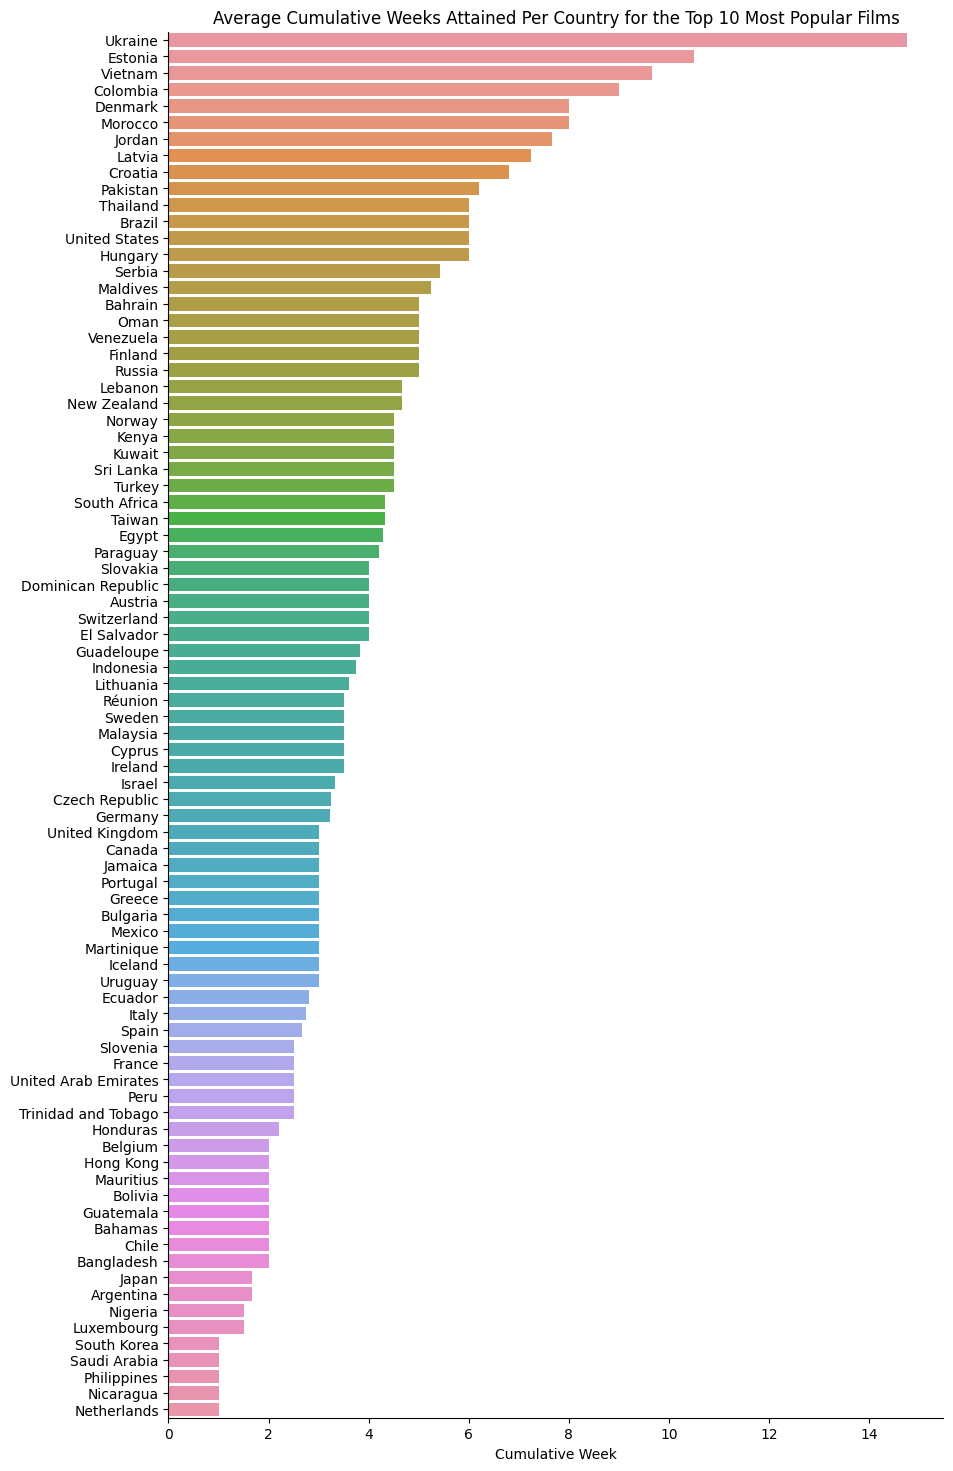

In [36]:
#select the rows with the top 10 most popular TV shows 

country_most_popular_film = country[country.show_title.isin(films_most_popular.show_title.values)]

plt.figure (figsize = (10,18))
sns.barplot(x = 'cumulative_weeks_in_top_10', y = 'country_name', data = country_most_popular_film.groupby('country_name')['cumulative_weeks_in_top_10'].mean().sort_values( ascending = False).reset_index(), errorbar = None)
plt.title('Average Cumulative Weeks Attained Per Country for the Top 10 Most Popular Films')
plt.ylabel('')
plt.xlabel ('Cumulative Week')
sns.despine()

### It appears that the top 10 countries that enjoyed the top 10 most popular films were 
1. Ukraine
2. Estonia
3. Vietnam
4. Colombia
5. Denmark
6. Morocco
7. Jordan
8. Latvia
9. Coratia
10. Pakistan



### While the countries that barely watched were 
1. Netherlands
2. Nicaragua
3. Philippines
4. Saudi Arabia
5. South Korea
6. Luxembourg
7. Nigeria
8. Argentina
9. Japan
10. Bangladesh

In [37]:
country_most_popular_film = country[country.show_title.isin(films_most_popular.show_title.values)]

final_film = country_most_popular_film.groupby(['country_name','show_title'])[['weekly_rank','cumulative_weeks_in_top_10']].mean().round().sort_values(ascending = False, by = ['country_name'])
final_film = final_film.reset_index()
final_film.sort_values(['cumulative_weeks_in_top_10'], ascending = [False]).reset_index(drop = True)

country_name  ... cumulative_weeks_in_top_10
0                 Ukraine  ...                       24.0
1                 Estonia  ...                       16.0
2                 Vietnam  ...                       14.0
3                  Jordan  ...                       13.0
4                 Ukraine  ...                       12.0
5                 Morocco  ...                       12.0
6                  Latvia  ...                       12.0
7                Maldives  ...                       11.0
8                 Denmark  ...                       10.0
9                Pakistan  ...                       10.0
10                Croatia  ...                        9.0
11               Colombia  ...                        9.0
12                Lebanon  ...                        9.0
13                Croatia  ...                        8.0
14                   Oman  ...                        8.0
15                 Turkey  ...                        8.0
16     Dominican Republic  ...                        8.0
17               Thailand  ...                        8.0
18                Finland  ...                        7.0
19                Austria  ...                        7.0
20         Czech Republic  ...                        7.0
21               Pakistan  ...                        7.0
22                Hungary  ...                        7.0
23                 Serbia  ...                        6.0
24                  Egypt  ...                        6.0
25                  Kenya  ...                        6.0
26                 Brazil  ...                        6.0
27          United States  ...                        6.0
28                 Jordan  ...                        6.0
29            New Zealand  ...                        6.0
30               Paraguay  ...                        6.0
31                 Greece  ...                        6.0
32              Venezuela  ...                        6.0
33                 Turkey  ...                        6.0
34                Bahrain  ...                        6.0
35                Iceland  ...                        6.0
36                Ukraine  ...                        6.0
37                 Serbia  ...                        6.0
38                 Serbia  ...                        5.0
39               Maldives  ...                        5.0
40               Portugal  ...                        5.0
41               Malaysia  ...                        5.0
42                 Russia  ...                        5.0
43                 Norway  ...                        5.0
44              Lithuania  ...                        5.0
45                Ukraine  ...                        5.0
46                Hungary  ...                        5.0
47                 Sweden  ...                        5.0
48                Bahrain  ...                        5.0
49              Indonesia  ...                        5.0
50              Indonesia  ...                        5.0
51                Germany  ...                        5.0
52                Ireland  ...                        5.0
53                 Taiwan  ...                        5.0
54                Estonia  ...                        5.0
55                 Israel  ...                        5.0
56              Sri Lanka  ...                        5.0
57                  Spain  ...                        5.0
58                 Kuwait  ...                        5.0
59   United Arab Emirates  ...                        5.0
60                 Jordan  ...                        4.0
61                Hungary  ...                        4.0
62            El Salvador  ...                        4.0
63                 Mexico  ...                        4.0
64                 France  ...                        4.0
65                 Kuwait  ...                        4.0
66                Ecuador  ...                        4.0
67                  Egypt  ...                        4.0
68         

### Red Notice, and The Adam Project were the favourites. Ryan Reynolds must have been tickled to learn this. 


## Last but not the least, which of the top 10 Films had the most screen time in my home country Nigeria?

In [38]:
df = country_most_popular_film[country_most_popular_film.country_name.isin(['Nigeria'])]
film_nigeria = df.groupby(['country_name','show_title'])[['weekly_rank','cumulative_weeks_in_top_10']].mean().round()
film_nigeria = film_nigeria.reset_index()
film_nigeria.sort_values(['cumulative_weeks_in_top_10'], ascending = [False]).reset_index(drop=True)

country_name        show_title  weekly_rank  cumulative_weeks_in_top_10
0      Nigeria  The Unforgivable          2.0                         2.0
1      Nigeria      The Gray Man          2.0                         1.0

# And this concludes my review. English TV shows were very popular globally but one TV show Squid Game really outperformed them all particularly when a standard metric was used. 


## Thank you for providing the datasets. It was truly a fun analysis and review. 